In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

22.45400768504684
0.7485346528290697


(array([  2.,   4.,  29., 110., 248., 292., 212.,  81.,  21.,   1.]),
 array([18.93770899, 19.59473595, 20.25176292, 20.90878988, 21.56581684,
        22.2228438 , 22.87987077, 23.53689773, 24.19392469, 24.85095166,
        25.50797862]),
 <BarContainer object of 10 artists>)

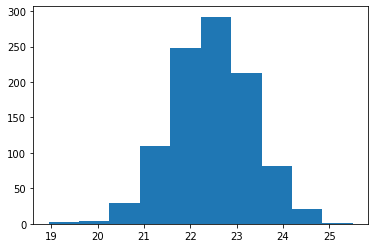

In [7]:
def gen_data(nobs=1000, a=.5,k=2):
    x = np.random.normal(scale=1., size=(nobs,k))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + a*x.sum(axis=1) + e
    return y,x,nobs


def add_constant(x):
    nobs = x.shape[0]
    x = np.concatenate( (np.ones(shape=(nobs,1)),x) ,axis=1)
    return x

def ols(y,x):
    x = add_constant(x)
    xx = (x.T).dot(x)
    beta = np.linalg.inv( xx ).dot( x.T ).dot(y)
    return beta

def predict(y,x):   
    beta  = ols(y,x)
    x = add_constant(x)
    return x.dot(beta)

def mse(k=2):
    y,x,nobs = gen_data(k=k)
    y_hat = predict(y,x)
    return (y - y_hat)**2
    
def normalize(x):
    nobs = x.shape[0]
    return x.mean()/np.sqrt(x.var()/nobs)


def run_mc1(trials=1000):
    result = []
    for i in range(trials):
        y =  mse()
        result.append(normalize(y))
    result = np.array(result)
    return result
    

result = run_mc1()
print(result.mean())
print(result.var())
plt.hist(result)